In [11]:
# reading data

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv', encoding='latin-1')

data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
# Drop unnecessary columns
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
data.columns = ['label', 'text']
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## EDA

In [13]:
# Check for missing values
data.isna().sum()

label    0
text     0
dtype: int64

In [14]:
data.shape

(5572, 2)

We have 5572 documents

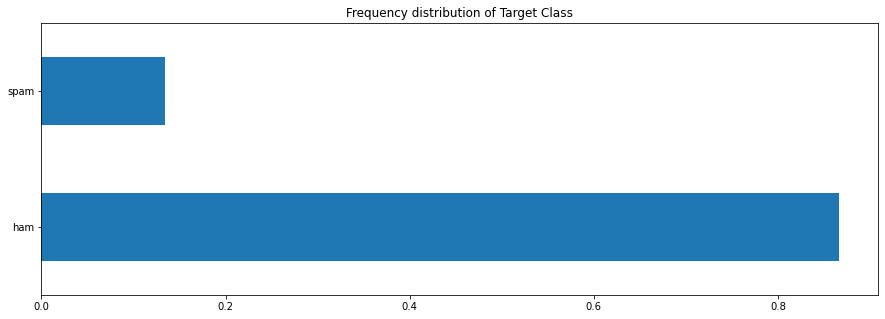

In [17]:
# Check target balance
figure = plt.subplots(figsize=(15, 5))
data['label'].value_counts(normalize=True).plot.barh()
plt.title('Frequency distribution of Target Class')
plt.show()

Looks like we have class imbalance problem here!!!
- classes: ham vs spam
- we have more instances of ham compared to spam

### Text Preprocessing

- Remove all special characters
- Lowercase all the words
- Tokenize
- Remove stopwords
- Lemmatize

<h1><center>- Text Preprocessing -</center></h1>
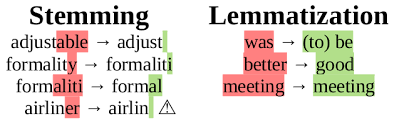


In [22]:
# Text preprocessing

import nltk
# nltk.download('all')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# create a list text
text = list(data['text'])

# preprocess loop
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

corpus = []

for i in range(len(text)):
    r = re.sub('[^a-zA-Z]', '', text[i])
    r = r.lower()
    r = r.split()
    r = [word for word in r if word not in stopwords.words('english')]
    r = [lemmatizer.lemmatize(word) for word in r]
    r = ' '.join(r)
    corpus.append(r)

# assign corpus to data['text']
data['text'] = corpus
data.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/vimukthi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/vimukthi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/vimukthi/nltk_data...


,label,text
0,ham,gountiljurongpointcrazyavailableonlyinbugisngr...
1,ham,oklarjokingwifuoni
2,spam,freeentryinawklycomptowinfacupfinaltktsstmayte...
3,ham,udunsaysoearlyhorucalreadythensay
4,ham,nahidontthinkhegoestousfhelivesaroundherethough


In [23]:
data['text'][0]

'gountiljurongpointcrazyavailableonlyinbugisngreatworldlaebuffetcinetheregotamorewat'

### Train-Test Split

Let's split the dataset into train and test before feature extraction

In [24]:
# create Feature and Label sets
X = data['text']
y = data['label']

# train test split (70% train - 30% test)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

print('Training Data: ', X_train.shape)
print('Test Data: ', X_test.shape)

Training Data:  (3900,)
Test Data:  (1672,)


### Feature Extraction

Here Bag of Words model(CountVectorizer) to convert the cleaned text into numeric features.

In [25]:
# Train Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X_train_cv = cv.fit_transform(X_train)
X_train_cv.shape

(3900, 3612)

### Model Training and Evaluation

- We are training a Logistic regression model and evaluating the confusion matrix of the trained model.

In [26]:
# Training Logistic Regresssion Model

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train_cv, y_train)

# transform X_test using CV
X_test_cv = cv.transform(X_test)

# Generate predictions
predictions = lr.predict(X_test_cv)

predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [27]:
# Confusion matrix

import pandas as pd

from sklearn import metrics

df = pd.DataFrame(metrics.confusion_matrix(y_test, predictions), index=['ham', 'spam'], columns=['ham', 'spam'])
df

,ham,spam
ham,1457,0
spam,210,5
